## A small model to simulate bunching at the state pension age

The agent's value function is

\begin{equation}
V_{t}(a_{t}) = \max_{c_{t},\,h_{t}}
\left(
\ln(c_{t}) - \frac{h_{t}^{2}}{2} + \beta V_{t+1}(a_{t+1})
\right)
\end{equation}
subject to
\begin{equation}
a_{t+1} = a_{t} - c_{t} + h_{t} + B_{t}(h_{t})
\end{equation}
with constraints $a_{t+1} \geq 0$ and $c_{t} \geq 0$.
If the labour market is perfectly flexible, then
$h_{t} \in [0,1]$. If the labour market is rigid, then
$h_{t} \in \{0,1\}$.

Before retirement ($t=1,2$), unemployed agents receive a smaller benefit.  
After retirement ($t=3,4$), income is means-tested. The benefit function is

\begin{equation}
B_{t}(h_{t}) =
\begin{cases}
0.5 \cdot X & \text{if } h_{t}=0,\; t=1,2 \\[6pt]
(1-\psi h_{t})X & \text{if } t=3,4
\end{cases}
\end{equation}
Finally, agents die in the last period:
\begin{equation}
V_{5}(a_{5}) = 0
\end{equation}


The goal is to simulate the model under perfectly flexible labour market and a rigid labour market. This in turn reveals how agents might bunch at the state pension age

In [197]:
%load_ext autoreload
%autoreload 2


import numpy as np
from time import time
import matplotlib.pyplot as plt
from main_file import ModelClass
from plots import plot_extensive_intensive

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Solve using perfectly flexible labour markets

In [198]:
model = ModelClass()
model.par.method = 'NVFI'  # Options: 'VFI', 'NVFI'
model.par.labour_market_flexibility = 'flexible'  # Options: 'flexible', 'rigid'
model.solve()

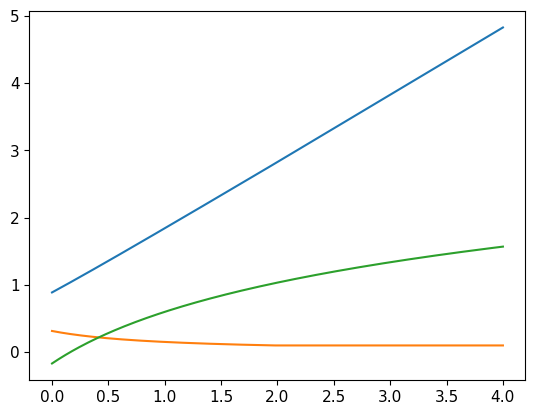

In [199]:
i = 3

plt.plot(model.par.a_grid, model.sol.c_work[i])
plt.plot(model.par.a_grid, model.sol.h_work[i])
plt.plot(model.par.a_grid, model.sol.V_work[i])

In [200]:
model.simulate()

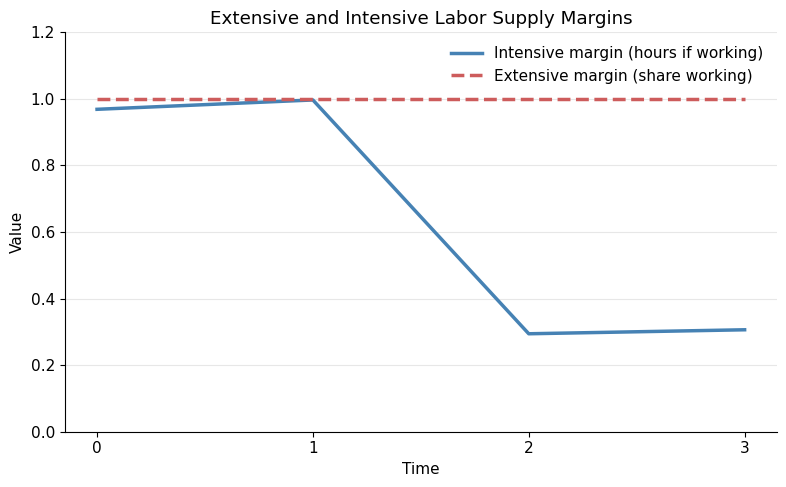

In [201]:
share_working = np.nanmean(np.where(model.sim.h > 0, 1.0, 0.0), axis=1)

hours_if_work = np.nanmean(np.where(model.sim.h > 0, model.sim.h, np.nan), axis=1)

plot_extensive_intensive(share_working, hours_if_work)

Conclusion: On the extensive margin, no agents retire at all. On the intensive margin, agents decrease hours worked because they are means tested.

Now we simulate the model with rigid labour markets:

C:\Users\per.eco\AppData\Local\Temp\ipykernel_16940\2053301520.py:7: RuntimeWarning: Mean of empty slice
  hours_if_work = np.nanmean(np.where(model.sim.h > 0, model.sim.h, np.nan), axis=1)


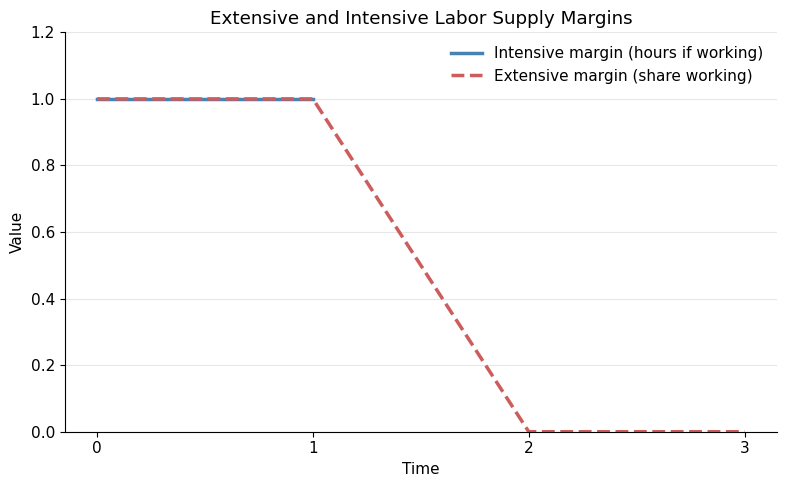

In [202]:
model.par.labour_market_flexibility = 'rigid'  # Options: 'flexible', 'rigid'
model.solve()
model.simulate()

share_working = np.nanmean(np.where(model.sim.h > 0, 1.0, 0.0), axis=1)

hours_if_work = np.nanmean(np.where(model.sim.h > 0, model.sim.h, np.nan), axis=1)

plot_extensive_intensive(share_working, hours_if_work)

Conclusion: Now all individuals retire at the "state pension age". Rigid labour markets have hence created bunching around the state pension age.